Wine Quality Prediction Using Machine Learning Algorithms: Reading and analyzing every ingredient is not possible for humans to do every time. Hence, for quick predictions, this algorithm has been developed.


*   Logistic Regression
*   SVM



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
wine_data_path = r"C:\Users\HARSH BATHRI\Desktop\practice\technohack\Technohack_MLinternship-main\winequality-red DATASET.csv" 
wine=pd.read_csv(wine_data_path )

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
wine.shape

(1599, 12)

In [9]:
wine.size

19188

In [10]:
wine.columns=wine.columns.str.strip()

In [11]:
wine.columns=wine.columns.str.lower()

In [12]:
wine.columns=wine.columns.str.replace(' ','_')

In [13]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
wine[wine.duplicated(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol','quality'],keep=False)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [15]:
wine.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol','quality'],keep='first',inplace=True)

In [16]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [17]:
wine.shape

(1359, 12)

In [18]:
wine.size

16308

In [19]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   ph                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [20]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

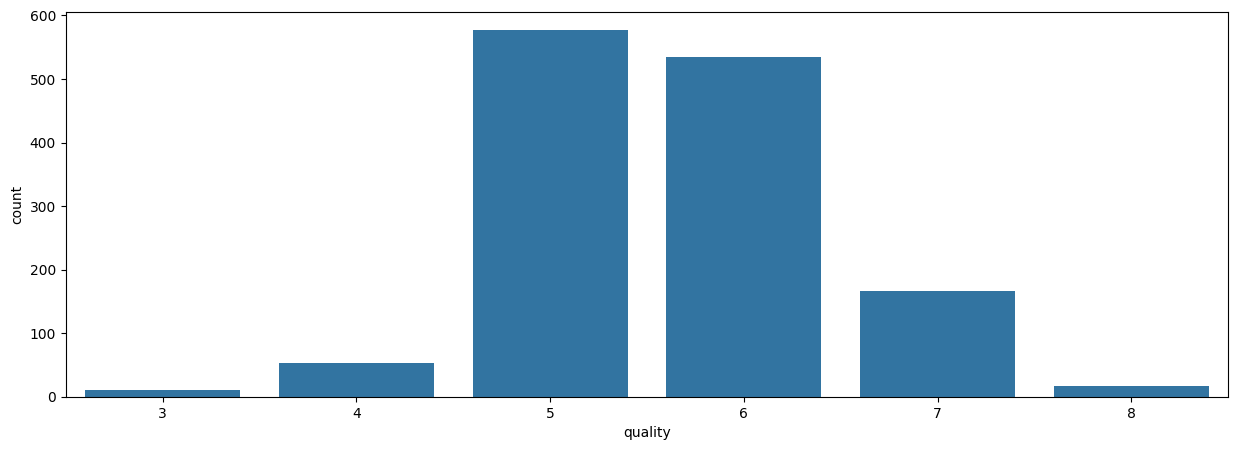

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=wine,x='quality')

In [22]:
wine['quality'].value_counts().to_frame()

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


<Axes: xlabel='quality', ylabel='count'>

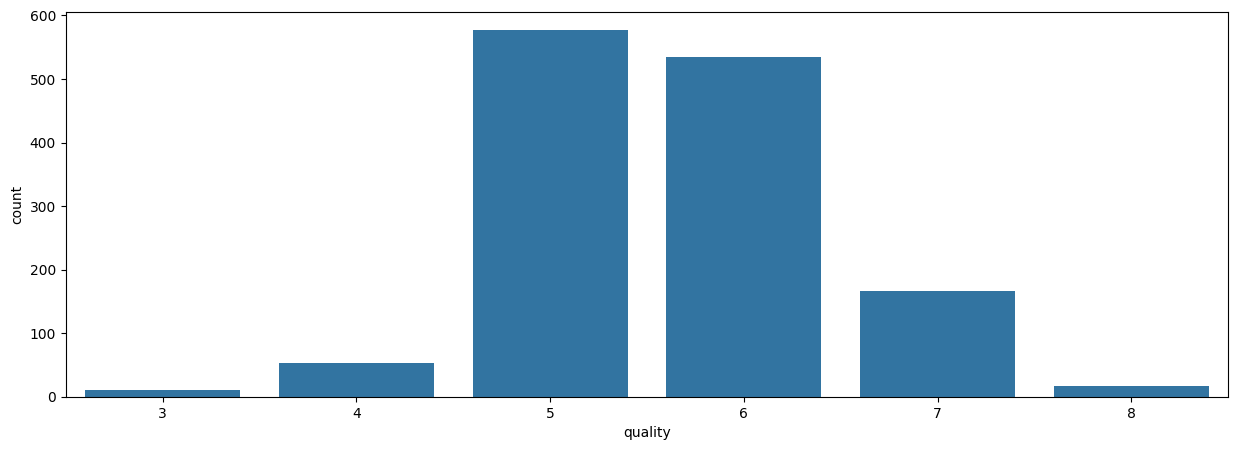

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=wine,x='quality')

In [24]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
ph,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: title={'center': 'correlation b/w features'}>

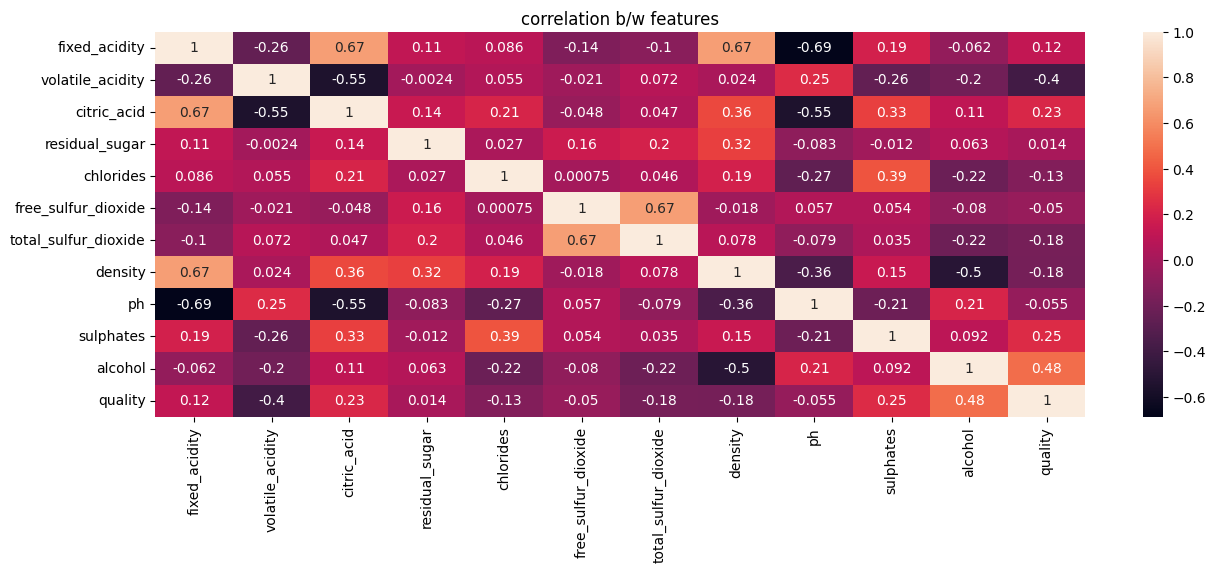

In [25]:
plt.figure(figsize=(15,5))
plt.title('correlation b/w features')
sns.heatmap(wine.corr(),annot=True)

In [26]:
wine_quality_corr=wine.corr()['quality'].to_frame()

<Axes: title={'center': 'correlation of target feature with predictor features'}, xlabel='quality', ylabel='None'>

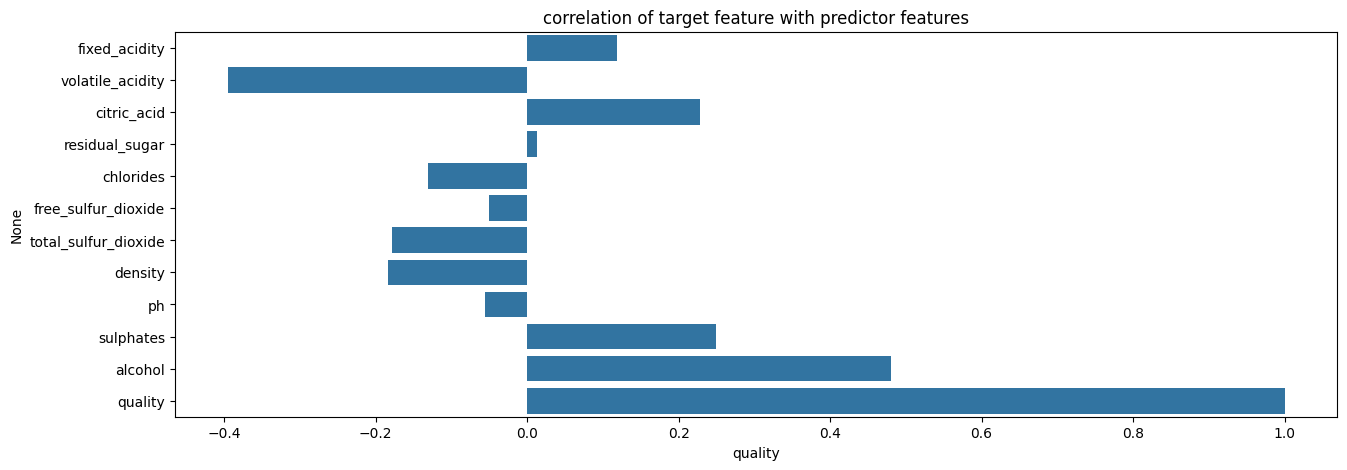

In [27]:
plt.figure(figsize=(15,5))
plt.title('correlation of target feature with predictor features')
sns.barplot(data=wine_quality_corr,y=wine_quality_corr.index,x='quality')

# Train Test

In [28]:
y=wine['quality']
x=wine.drop(['quality'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((951, 11), (408, 11), (951,), (408,))

Logistic Reg

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression(max_iter=10000)

In [34]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.score(x_test,y_test)

0.6102941176470589

In [35]:
y_pred=lr.predict(x_test)

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

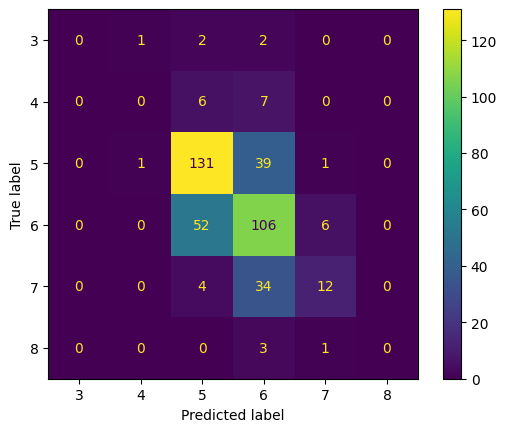

In [37]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [39]:
lr_results = confusion_matrix(y_test,y_pred)
print("confusion matrix: ")
print(lr_results)
print()
print("The accuracy is: ",confusion_matrix(y_test,y_pred))

confusion matrix: 
[[  0   1   2   2   0   0]
 [  0   0   6   7   0   0]
 [  0   1 131  39   1   0]
 [  0   0  52 106   6   0]
 [  0   0   4  34  12   0]
 [  0   0   0   3   1   0]]

The accuracy is:  [[  0   1   2   2   0   0]
 [  0   0   6   7   0   0]
 [  0   1 131  39   1   0]
 [  0   0  52 106   6   0]
 [  0   0   4  34  12   0]
 [  0   0   0   3   1   0]]


In [40]:
from sklearn.svm import SVC

In [41]:
svc=SVC()

In [42]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
svc.score(x_test,y_test)

0.5049019607843137

In [43]:
y_pred=lr.predict(x_test)

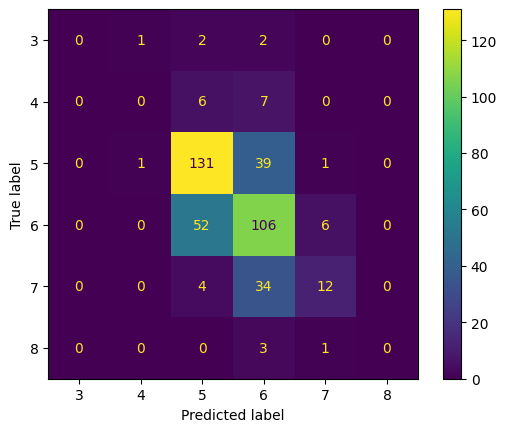

In [44]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=svc.classes_),display_labels=svc.classes_)
cmd.plot()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
lr_results = confusion_matrix(y_test,y_pred,labels=svc.classes_)
print("confusion matrix: ")
print(lr_results)
print()
print("The accuracy is: ",accuracy_score(y_test,y_pred))

confusion matrix: 
[[  0   1   2   2   0   0]
 [  0   0   6   7   0   0]
 [  0   1 131  39   1   0]
 [  0   0  52 106   6   0]
 [  0   0   4  34  12   0]
 [  0   0   0   3   1   0]]

The accuracy is:  0.6102941176470589
